<a href="https://colab.research.google.com/github/tderr24/MAT-422/blob/main/HW_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 422

## HW 3.4 - Logistic Regression

### Thomas Derr

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn import datasets
import math

Logistic regression is a form of regression that uses a logistic function to model a binary dependent variable

Given an input $\{(\alpha_i, b_i): i=1, ..., n\}$

where $\alpha_i \in \mathbb{R}^d$ and $b_i \in  \{0,1\}$

We can then construct a matrix

$A \in \mathbb{R}^{n\times d}$ with rows $\alpha^T_1, ..., \alpha^T_n$

And a list $ b = ( b_1, ..., b_n)^T \in \{0,1\}^n$

We want to find a logit function that approximates the probability that a label is $1$

for $x, \alpha \in \mathbb{R}^d$, we say that

$p(\alpha; x)$ is the probability of output $1$

We define

$\log \frac{p(\alpha;x)}{1 - p(\alpha;x)} = \alpha^Tx = \sum x_i \alpha_i$

If we rearange the expression we get

$p(\alpha;x) = \sigma(\alpha^Tx)$

Where $\sigma(t) = \frac{1}{1+e^{-t}}, t \in \mathbb{R}$



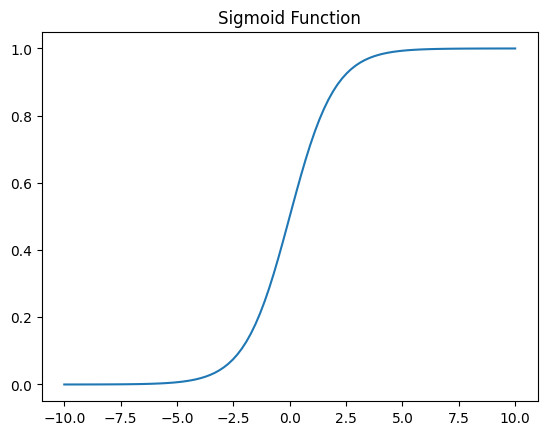

In [2]:
def sigmoid(t):
    return 1 / (1 + np.e ** (-t))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

fig, ax = plt.subplots()
plt.title("Sigmoid Function")
ax.plot(x, y)


We wish to maximize the likelihood function,

$\mathscr{L}(X;a,B) = \prod \limits _{i=1}^n p(\alpha_i; x) ^{b_i} (1-p(\alpha_i; x))^{1-b_i}$

If we take the log of this scaled by $-\frac{1}{n}$ and substite in the sigmoid function from earlier, we now wish to find the minimum of

$\mathscr{l}(x;A,b) = -\frac{1}{n}\sum \limits _{i=1} ^ n b_i
\log(\sigma(\alpha^Tx))    -\frac{1}{n}\sum \limits _{i=1} ^ n (1-b_i)
\log(1-\sigma(\alpha^Tx))$

We wish to find the gradient of this function, which ends up being


$\nabla_x \mathscr{l}(x;A,b) = -\frac{1}{n}\sum \limits _{i=1} ^ n (b_i
-\sigma(\alpha_i^Tx)) \alpha_i $

We can then compute the Hessian

$\nabla_X^2\mathscr{l}(x;A,b) = \frac{1}{n}\sum \limits _{i=1} ^ n \sigma(\alpha_i^Tx) (1- \sigma(\alpha_i^Tx))\alpha_i\alpha_i^T$



Because each $\alpha_i\alpha^T_i$ is a symetric matrix, we know $\mathscr{l}(x;A,b)$ to be convex as a function of $x$. This is why we go through the effor to convert to cross-entropy loss instead of using mean squared error.

The iterative function for gradient descent is then

$x^{k+1} = x^k + \beta \frac{1}{n} \sum \limits _{i=1} ^ n (b_i - \sigma(\alpha_i^Tx^k))\alpha_i$

Text(0.5, 0.92, '3 Feature Ground Truth of Iris Dataset')

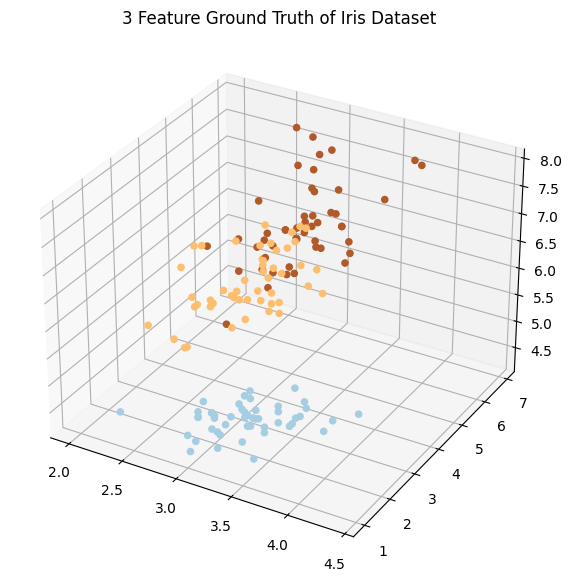

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :3]  # we only take the first two features.
Y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

z = X[:,0]
x = X[:,1]
y = X[:,2]



fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, c=Y, cmap=plt.cm.Paired, alpha=1)
plt.title("3 Feature Ground Truth of Iris Dataset")

Text(0.5, 0.92, '3 Feature Prediction of Iris Dataset Test Data')

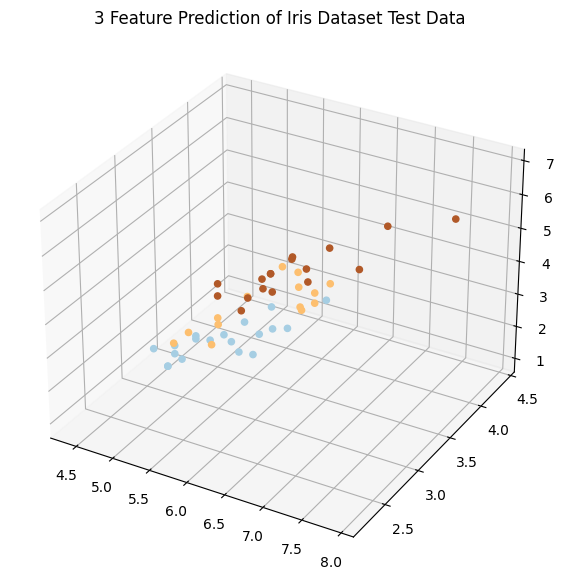

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

z = X_train[:,0]
x = X_train[:,1]
y = X_train[:,2]


log = LogisticRegression(C=1, solver='liblinear')
log.fit(X_train,y_train)


fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X_test[:,0],
             X_test[:,1],
             X_test[:,2],
             c=log.predict(X_test),
             cmap=plt.cm.Paired,
             alpha=1)
plt.title("3 Feature Prediction of Iris Dataset Test Data")

Text(0.5, 0.92, '3 Feature Ground Truth of Iris Dataset Test Data')

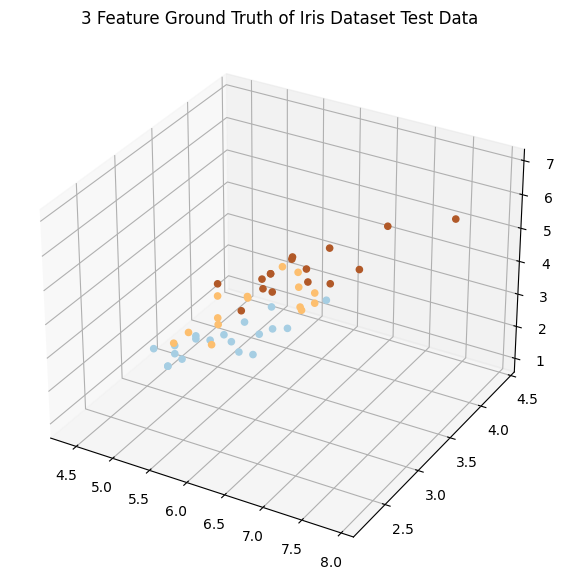

In [5]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X_test[:,0],
             X_test[:,1],
             X_test[:,2],
             c= y_test,
             cmap=plt.cm.Paired,
             alpha=1)
plt.title("3 Feature Ground Truth of Iris Dataset Test Data")
